In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r'D:\AMIT Course\\car_evaluation.csv',  header=None)
df.head(20)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [42]:
label_encoder = LabelEncoder()
df[0] = label_encoder.fit_transform(df[0])
df[1] = label_encoder.fit_transform(df[1])
df[2] = label_encoder.fit_transform(df[2])
df[3] = label_encoder.fit_transform(df[3])
df[4] = label_encoder.fit_transform(df[4])
df[5] = label_encoder.fit_transform(df[5])
df[6] = label_encoder.fit_transform(df[6])

In [43]:
##x=df.drop(columns =6)
X=df.drop(columns =6)
y=df[6]


In [44]:
X


,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
model = DecisionTreeClassifier()

# Train the classifier on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9682080924855492


In [49]:
 confusion_matrix(y_test, y_pred)

array([[ 76,   6,   1,   0],
       [  1,  10,   0,   0],
       [  0,   0, 235,   0],
       [  1,   2,   0,  14]], dtype=int64)

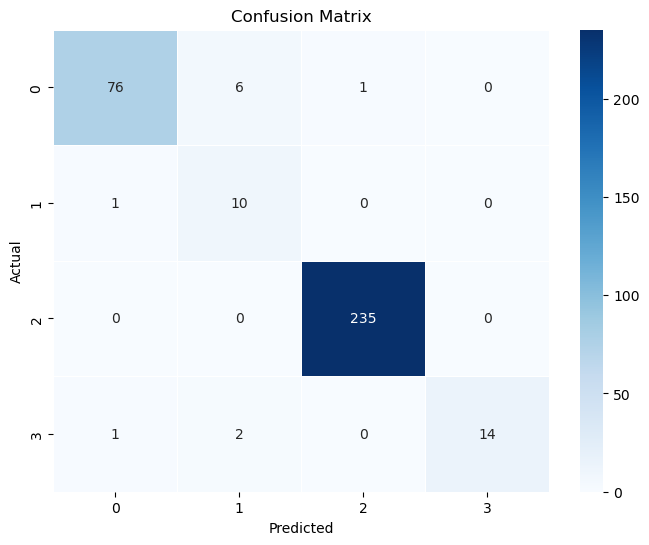

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap( confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()